In [1]:
# importing required libraries
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns 

from sklearn import datasets
from sklearn import manifold

In [2]:
data = datasets.fetch_openml(
    "mnist_784",
    version = 1,
    return_X_y=True
)
pixel_values, targets = data
targets = targets.astype(int)


In [12]:
pixel_values.iloc[1]

pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Name: 1, Length: 784, dtype: int64

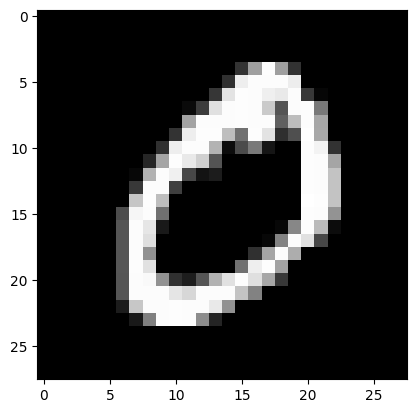

In [14]:
# single_image = pixel_values.iloc[1]
# arr = single_image.values
# reshaped_arr = arr.reshape(28,28)

single_image = pixel_values.iloc[1].values.reshape(28,28)

plt.imshow(single_image, cmap="gray")

In [16]:
tsne = manifold.TSNE(n_components=2, random_state=42)

transformed_data = tsne.fit_transform(pixel_values.iloc[:3000, :])

In [18]:
transformed_data

array([[ 20.487055  ,  -7.4852405 ],
       [ 56.610996  ,  -3.7159562 ],
       [  0.33826387, -52.230972  ],
       ...,
       [-32.486187  , -15.181126  ],
       [-14.569369  ,  28.48985   ],
       [ 14.2887    , -23.91808   ]], shape=(3000, 2), dtype=float32)

In [21]:
tsne_df = pd.DataFrame(
    np.column_stack((transformed_data, targets.iloc[:3000])),
    columns = ["x", "y", "targets"]
)

tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)

In [22]:
tsne_df.head()

,x,y,targets
0,20.487055,-7.485240,5.0
1,56.610996,-3.715956,0.0
2,0.338264,-52.230972,4.0
3,-47.548889,14.102198,1.0
4,-9.717135,-30.256355,9.0


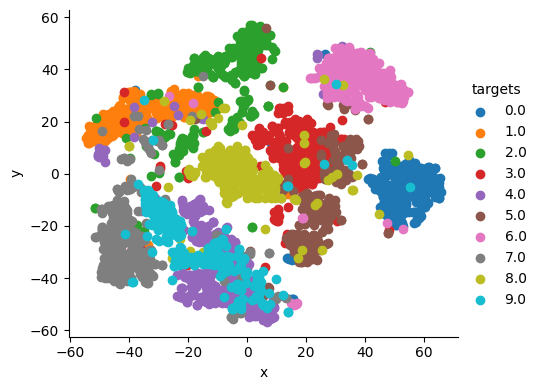

In [24]:
grid = sns.FacetGrid(tsne_df, hue="targets", height=4, aspect=1.2)

grid.map(plt.scatter, "x", "y").add_legend()